In [1]:
# page46

from sklearn import datasets

from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [2]:
# page48

X = iris.data[:,[0,2]]
y = iris.target

print(X.shape)

feature_names = [iris.feature_names[0],iris.feature_names[2]]
print(feature_names)

df_X = pd.DataFrame(X)
print(df_X.head())

(150, 2)
['sepal length (cm)', 'petal length (cm)']
     0    1
0  5.1  1.4
1  4.9  1.4
2  4.7  1.3
3  4.6  1.5
4  5.0  1.4


In [3]:
# page49
print(y.shape)

df_Y = pd.DataFrame(y)
print(df_Y.head())

(150,)
   0
0  0
1  0
2  0
3  0
4  0


In [4]:
# page50

print(set(y))
print(iris.target_names)

{np.int64(0), np.int64(1), np.int64(2)}
['setosa' 'versicolor' 'virginica']


In [5]:
# page51

print(df_X.isnull().sum())
print(df_Y.isnull().sum())

0    0
1    0
dtype: int64
0    0
dtype: int64


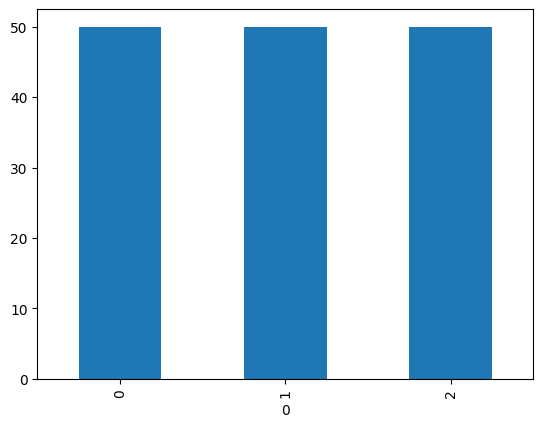

In [6]:
# page52

df_Y[0].value_counts().plot(kind='bar')
plt.show()

(150, 2)


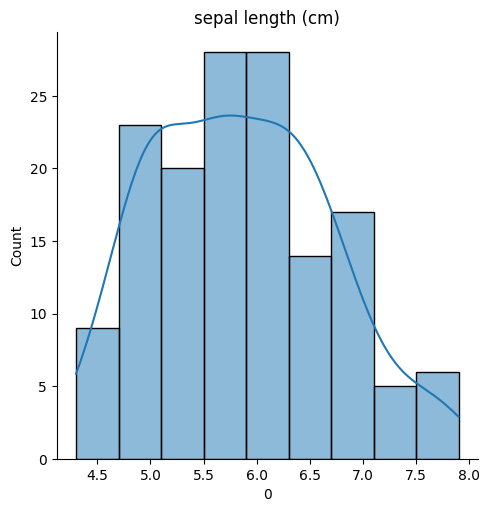

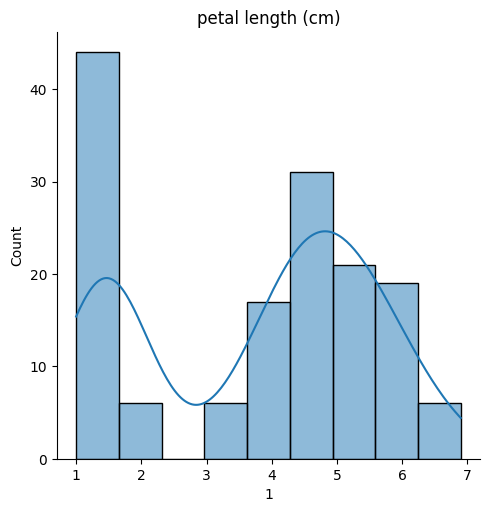

In [10]:
# page53

for i in range(df_X.shape[1]):
  sns.displot(df_X[i], kind='hist', kde=True)
  plt.title(feature_names[i])
  plt.show()

In [12]:
# page54

pca = PCA(copy=True, iterated_power='auto', n_components=2, random_state=None, svd_solver='auto', tol=0.0, whiten=False)
pca.fit(X)

PCA(n_components=2)

In [13]:
# page55
print(pca.explained_variance_)
PCscore = pca.transform(X)
print(PCscore[0:5])

[3.66189877 0.1400726 ]
[[-2.46024094  0.24479165]
 [-2.53896211  0.06093579]
 [-2.70961121 -0.08355948]
 [-2.56511594 -0.25420858]
 [-2.49960153  0.15286372]]


In [19]:
# page56

eigens_v = pca.components_.transpose()

mX = np.matrix(X)
for i in range(X.shape[1]):
  mX[:,i] = mX[:,i]-np.mean(X[:,i])

dfmX = pd.DataFrame(mX)

print((mX * eigens_v)[0:5])

[[-2.46024094  0.24479165]
 [-2.53896211  0.06093579]
 [-2.70961121 -0.08355948]
 [-2.56511594 -0.25420858]
 [-2.49960153  0.15286372]]


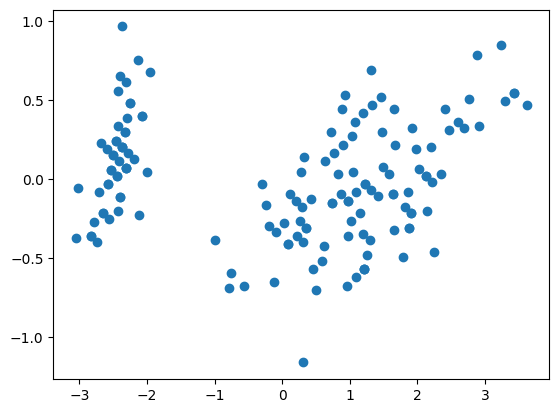

In [18]:
# page57

plt.scatter(PCscore[:,0], PCscore[:,1])
plt.show()

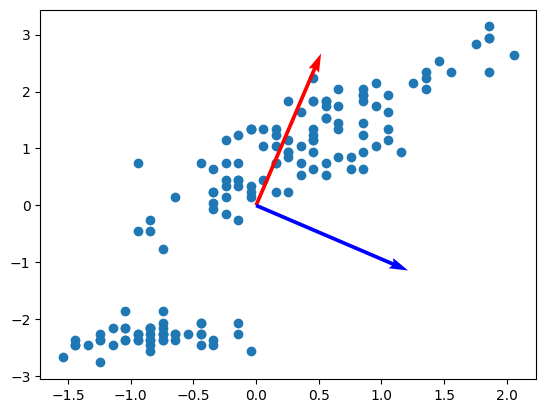

In [20]:
# page58

plt.scatter(dfmX[0], dfmX[1])
origin_x = [0, 0]
origin_y = [0, 0]
plt.quiver(origin_x,
           origin_y,
           [eigens_v[0, 0], eigens_v[0, 1]], # u (x-component of arrows)
           [eigens_v[1, 0], eigens_v[1, 1]], # v (y-component of arrows)
           color=["r","b"],scale=3)
plt.show()

In [23]:
# page59

X2 = iris.data
pca2 = PCA(copy=True, iterated_power='auto', n_components=4, random_state=None, svd_solver='auto', tol=0.0, whiten=False)
pca2.fit(X2)

PCA(n_components=4)

In [24]:
# page60

print(pca2.explained_variance_)

[4.22824171 0.24267075 0.0782095  0.02383509]


In [27]:
# page61
PCs = pca2.transform(X2)[:,0:2]

print(PCs[0:5])

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


In [30]:
# page62

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

clf = LogisticRegression(solver='sag', multi_class='multinomial').fit(X2,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [32]:
# page63

clf2 = LogisticRegression(solver='sag', multi_class='multinomial').fit(PCs,y)
clf2.predict(PCs)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
# page64

confusion_matrix(y,clf2.predict(PCs))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]])

In [34]:
# page65

clf3 = LogisticRegression(solver='sag', max_iter=1000, random_state=0, multi_class='multinomial').fit(X2[:,0:2],y)
confusion_matrix(y,clf3.predict(X2[:,0:2]))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


array([[49,  1,  0],
       [ 0, 37, 13],
       [ 0, 14, 36]])